# Political Partisanship: A look at the data

In the age of Trump it's easy to automatically assume that political partisanship and polarization in the US is at historically high levels. In the spirit of chin-stoking contrarians, I decided to have a look at some data and see if this was really the case. Long story short: yes. 

## Congressional Party Vote Unity

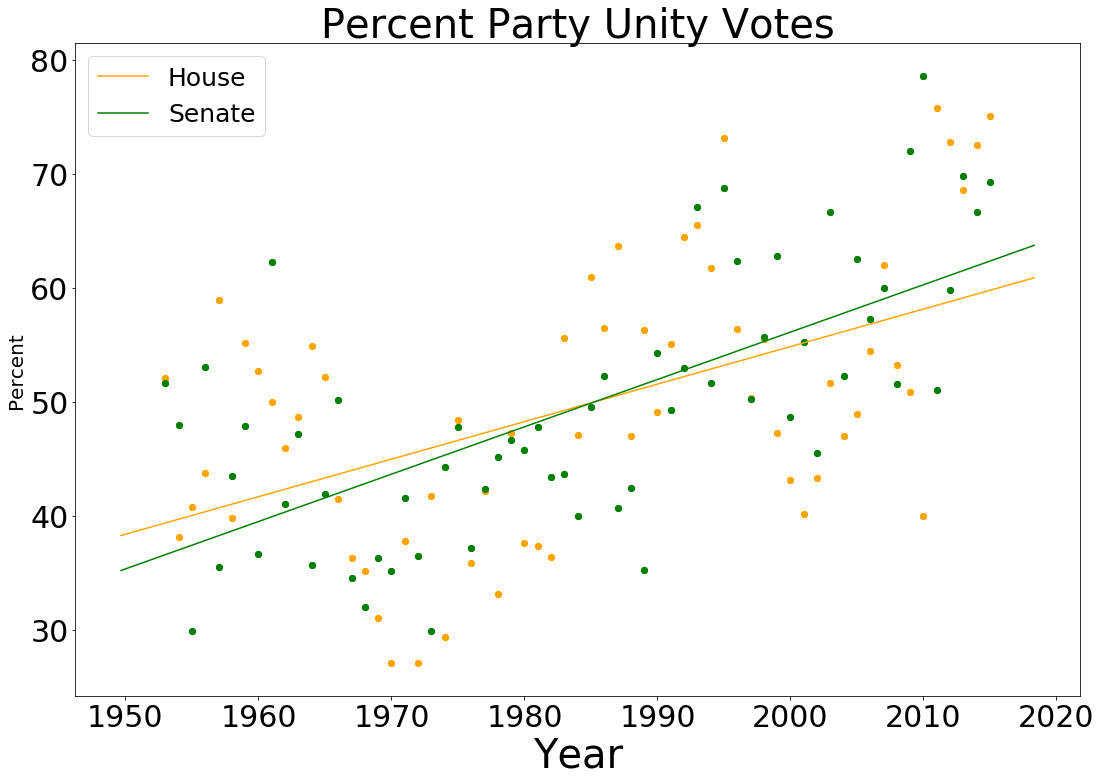

In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

party_vote_unity_df = pd.read_csv('data/party_vote_unity.csv', index_col=0)
house_party_vote_unity = party_vote_unity_df.loc[party_vote_unity_df['Chamber'] == 'House']
senate_party_vote_unity = party_vote_unity_df.loc[party_vote_unity_df['Chamber'] == 'Senate']
fig = plt.figure(figsize=[18, 12])
ax = plt.subplot()

#https://www.brookings.edu/wp-content/uploads/2017/01/vitalstats_ch8_tbl3.pdf
#house_party_vote_unity.loc[1953]['PctPartyUnityVotes']

'''Data include the percentage of roll-call votes in which a percentage of voting Dems opposed
a majority of voting Republicans'''
for year in party_vote_unity_df.index.values: 
    ax.scatter(year, house_party_vote_unity.loc[year]['PctPartyUnityVotes'], color='orange')
    ax.scatter(year, senate_party_vote_unity.loc[year]['PctPartyUnityVotes'], color='green')
house_best_fit_coeffs = np.polyfit(list(set(house_party_vote_unity.index.values)), 
                                   list(house_party_vote_unity['PctPartyUnityVotes']), deg=1)
house_func = np.poly1d(house_best_fit_coeffs)
x_0, x_1 = ax.get_xlim()
ax.plot([x_0, x_1], [house_func(x_0), house_func(x_1)], color='orange', label='House')

senate_best_fit_coeffs = np.polyfit(list(set(senate_party_vote_unity.index.values)), 
                                   list(senate_party_vote_unity['PctPartyUnityVotes']), deg=1)
senate_func = np.poly1d(senate_best_fit_coeffs)
ax.plot([x_0, x_1], [senate_func(x_0), senate_func(x_1)], color='green', label='Senate')
ax.legend(fontsize=25)

ax.set_title('Percent Party Unity Votes', fontsize=40)
ax.set_xlabel('Year', fontsize=40)
ax.set_ylabel('Percent', fontsize=20)
ax.tick_params(labelsize=30)

plt.savefig('images/party_unity.png')
plt.show()